Decision Tree

Tiatnic Survival Dataset

In [42]:
#Import the Necessary Libraries
import pandas as pd
df=pd.read_csv('train.csv');
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [43]:
df=df.drop(columns=['Name', 'Ticket', 'Cabin'],errors='ignore')
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [44]:
#Look at top values of train data 
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [45]:
#Print the column names of train data
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


In [4]:
#Replace the msiing values in Embarked column by 'S'
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")  # Ensure the correct file path

# Replace missing values in 'Embarked' with 'S'
df['Embarked'] = df['Embarked'].fillna('S')

# Check if any missing values remain  # Should print 0 if all missing values are replaced


In [47]:
#Impute the missing values in Fare column with median value
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")  # Ensure the correct file path

# Impute missing values in 'Fare' with the median value (without inplace=True)
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Check if any missing values remain
 # Should print 0 if all missing values are filled


In [48]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")  # Load dataset

# Find missing Age values
missing_ages = df['Age'].isnull()

# Generate random values from normal distribution and assign them safely
df.loc[missing_ages, 'Age'] = np.random.normal(df['Age'].mean(), df['Age'].std(), missing_ages.sum())

# Check if missing values are filled
print(df['Age'].isnull().sum())  # Should print 0



0


In [49]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [50]:
#Print the dimension of train and test data
from sklearn.model_selection import train_test_split
x=df[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=df['Survived']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (623, 8)
X_test shape: (268, 8)
y_train shape: (623,)
y_test shape: (268,)


In [51]:
#Print the number of missing values in each column of train and test data
print(x_train.isnull().sum())
print(x_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
0
0


## Data Visualization

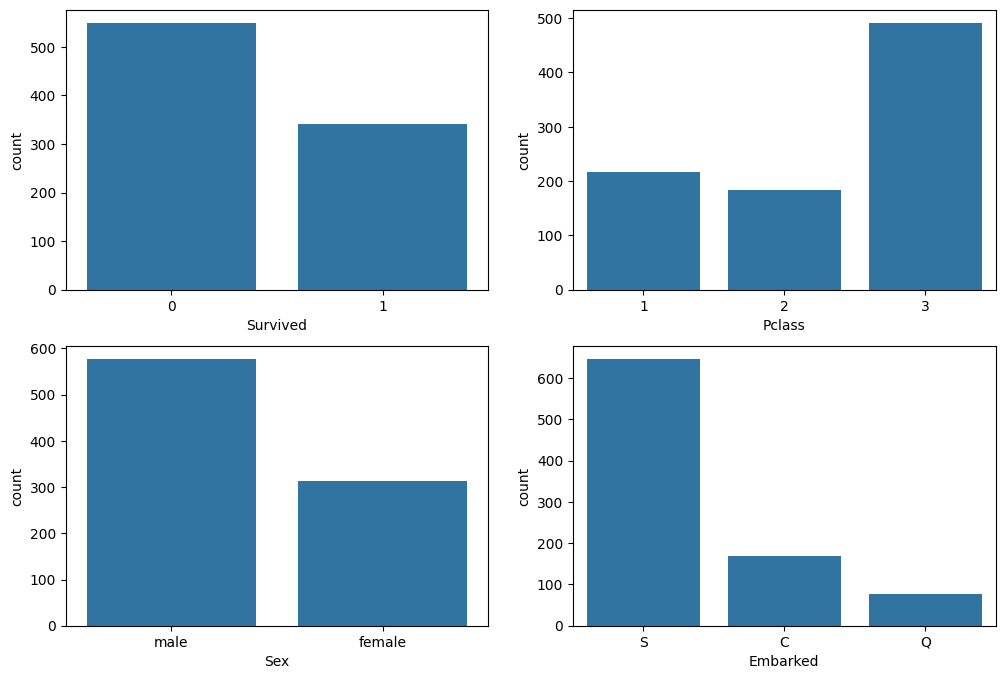

In [7]:
#Barchart of Survived, Pclass, Sex, Embarked
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Corrected seaborn countplot calls
sns.countplot(x='Survived', data=df, ax=axes[0, 0])
sns.countplot(x='Pclass', data=df, ax=axes[0, 1])
sns.countplot(x='Sex', data=df, ax=axes[1, 0])
sns.countplot(x='Embarked', data=df, ax=axes[1, 1])

plt.show()


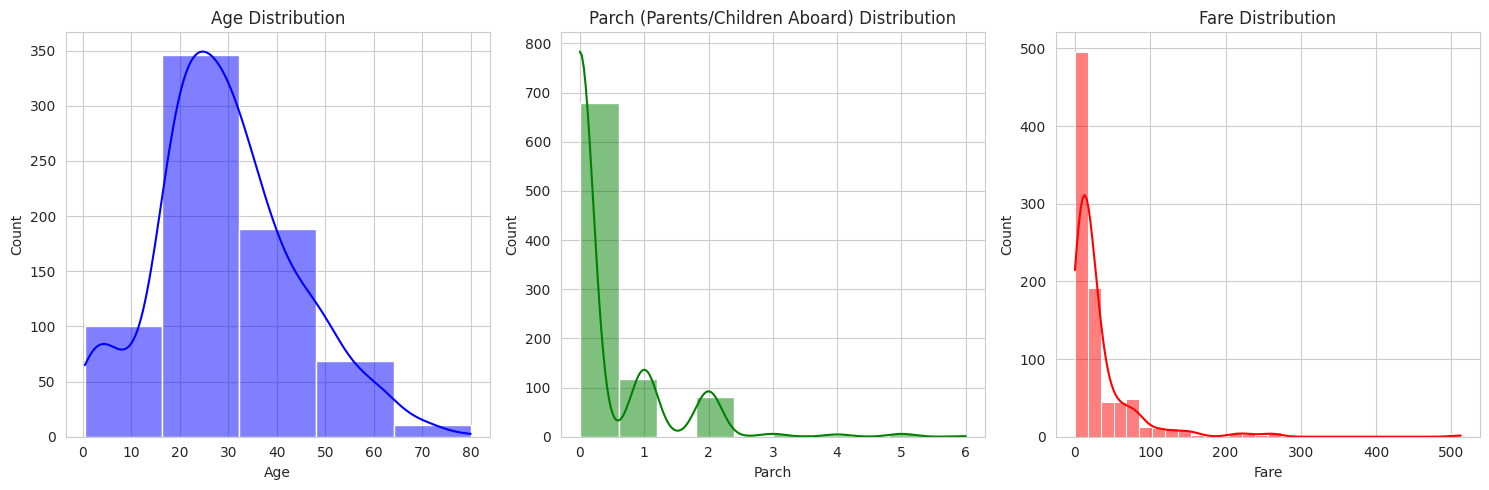

In [13]:
#Histogram of Age, Parch, Fare
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("train.csv")  # Ensure the correct file path


# Create subplots for histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Set the plot style
sns.set_style("whitegrid")
# Histogram for 'Age'
sns.histplot(df['Age'], bins=5, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Age Distribution")

# Histogram for 'Parch'
sns.histplot(df['Parch'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title("Parch (Parents/Children Aboard) Distribution")

# Histogram for 'Fare'
sns.histplot(df['Fare'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title("Fare Distribution")

# Adjust layout
plt.tight_layout()
plt.show()


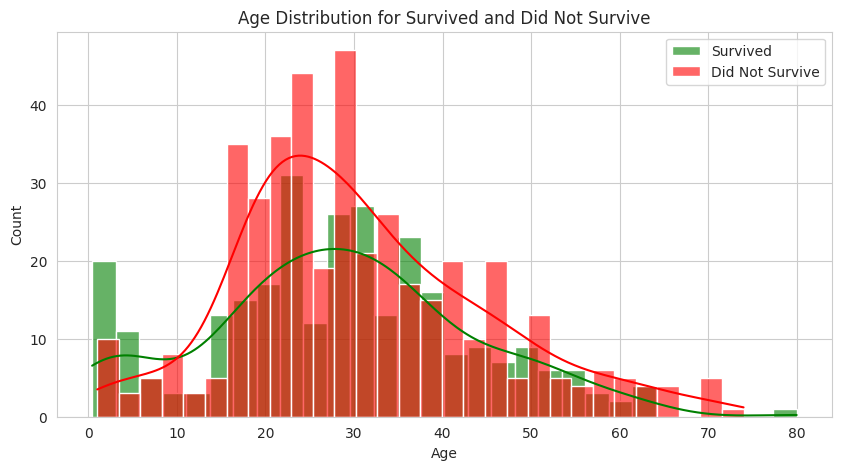

In [10]:
#Plot histogram of age for survived and did not survived class
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("train.csv")  # Ensure correct file path

# Set the plot style
sns.set_style("whitegrid")

# Create the histogram plot
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived', alpha=0.6)
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Did Not Survive', alpha=0.6)

# Set plot labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution for Survived and Did Not Survive")
plt.legend()

# Show the plot
plt.show()


/tmp/ipykernel_12221/1372327518.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ci=None, palette='coolwarm')


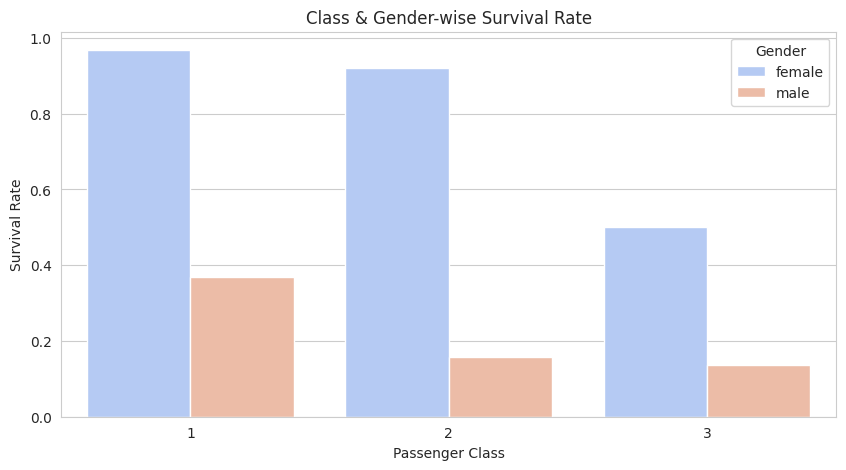

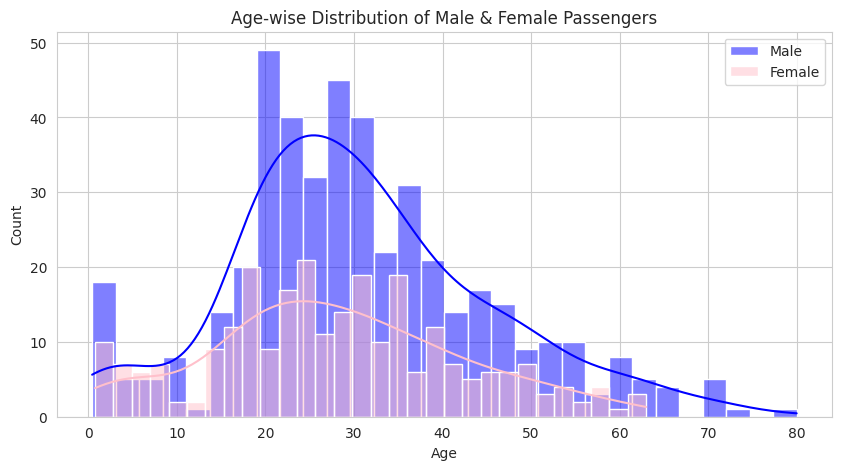

In [55]:
#Count class and gender wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("train.csv")  # Ensure the correct file path

# Set the plot style
sns.set_style("whitegrid")

### 1️⃣ Count Class & Gender-wise Survival Rate (Bar Chart) ###
plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ci=None, palette='coolwarm')

# Set labels and title
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Class & Gender-wise Survival Rate")
plt.legend(title="Gender")
plt.show()

### 2️⃣ Age-wise Distribution of Male & Female Passengers (Histogram) ###
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Sex'] == 'male']['Age'], bins=30, kde=True, color='blue', label='Male', alpha=0.5)
sns.histplot(df[df['Sex'] == 'female']['Age'], bins=30, kde=True, color='pink', label='Female', alpha=0.5)

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age-wise Distribution of Male & Female Passengers")
plt.legend()
plt.show()


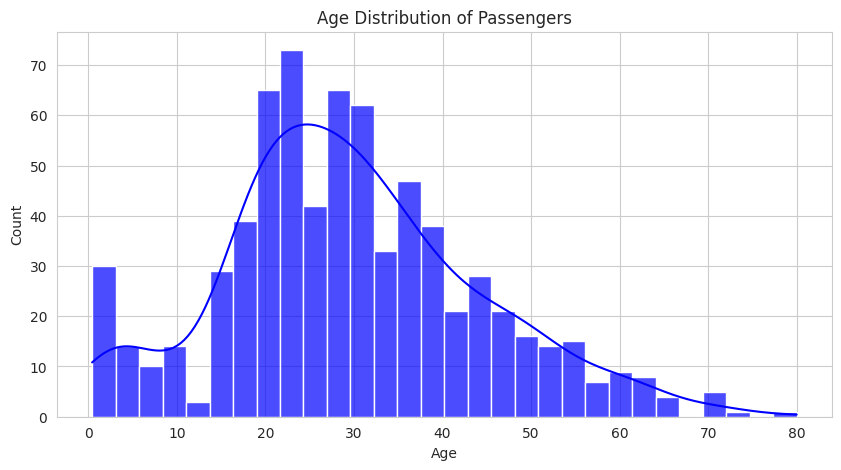

In [56]:
#Histogram of Age of the given data set(sample)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("train.csv")  # Ensure the correct file path

# Set the plot style
sns.set_style("whitegrid")

# Create a histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue', alpha=0.7)

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")

# Show the plot
plt.show()


## Handling Missing Values

## Feature Engineering - Creating new features

In [57]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df.FamilySize)

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64


In [58]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
print(df.IsAlone)

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int64


## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [59]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'],errors='ignore')


## Model Building

In [60]:
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  \
0         0       3    male  22.0      1      0   7.2500        S           2   
1         1       1  female  38.0      1      0  71.2833        C           2   
2         1       3  female  26.0      0      0   7.9250        S           1   
3         1       1  female  35.0      1      0  53.1000        S           2   
4         0       3    male  35.0      0      0   8.0500        S           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  


In [61]:
#Prepare X and y
from sklearn.model_selection import train_test_split
x=df[['Sex','Age','Pclass','SibSp','Parch','Fare','Embarked']]
y=df['Survived']
print(x)
print(y) 

        Sex   Age  Pclass  SibSp  Parch     Fare Embarked
0      male  22.0       3      1      0   7.2500        S
1    female  38.0       1      1      0  71.2833        C
2    female  26.0       3      0      0   7.9250        S
3    female  35.0       1      1      0  53.1000        S
4      male  35.0       3      0      0   8.0500        S
..      ...   ...     ...    ...    ...      ...      ...
886    male  27.0       2      0      0  13.0000        S
887  female  19.0       1      0      0  30.0000        S
888  female   NaN       3      1      2  23.4500        S
889    male  26.0       1      0      0  30.0000        C
890    male  32.0       3      0      0   7.7500        Q

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [62]:


# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to the 'Sex' column
df['Sex'] = encoder.fit_transform(df['Sex'])

# Display first few rows
print(df.Sex)


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [16]:
# concat df_categorical with original df

from sklearn.preprocessing import LabelEncoder


# List of categorical columns to encode
categorical_columns = ["Sex", "Embarked"]

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply encoding to categorical columns
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])
    print(df[col])
# Display the first few rows of the updated DataFrame



0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64


In [65]:
#Do a pairplot of all features
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Apply encoding to categorical columns
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Display the first few rows of the updated DataFrame
print(df.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  \
0         0       3    1  22.0      1      0   7.2500         2           2   
1         1       1    0  38.0      1      0  71.2833         0           2   
2         1       3    0  26.0      0      0   7.9250         2           1   
3         1       1    0  35.0      1      0  53.1000         2           2   
4         0       3    1  35.0      0      0   8.0500         2           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  


In [ ]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
X_train, X_validation, y_train, y_validation = train_test_split(
    x, y, test_size=0.1, random_state=42, stratify=y
)

# Display the shape of each split
print("X_train shape:", X_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_train shape:", y_train.shape)
print("y_validation shape:", y_validation.shape)


In [ ]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("train.csv")

# Drop non-relevant columns
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Encode categorical columns (Sex, Embarked)
label_enc = LabelEncoder()
df["Sex"] = label_enc.fit_transform(df["Sex"])  # male -> 1, female -> 0
df["Embarked"] = label_enc.fit_transform(df["Embarked"])  # C -> 0, Q -> 1, S -> 2

# Define features (X) and target (y)
X = df.drop(columns=["Survived"])  # Features
y = df["Survived"]  # Target variable

# Split into training (90%) and validation (10%) sets
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_validation)

# Evaluate the model
accuracy = accuracy_score(y_validation, y_pred)
print("Decision Tree Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_validation, y_pred))



In [29]:
#Print the tree

# Importing required packages for visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Sample dataset
data = load_iris()
X = data.data
y = data.target

# Train the classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)



DecisionTreeClassifier()

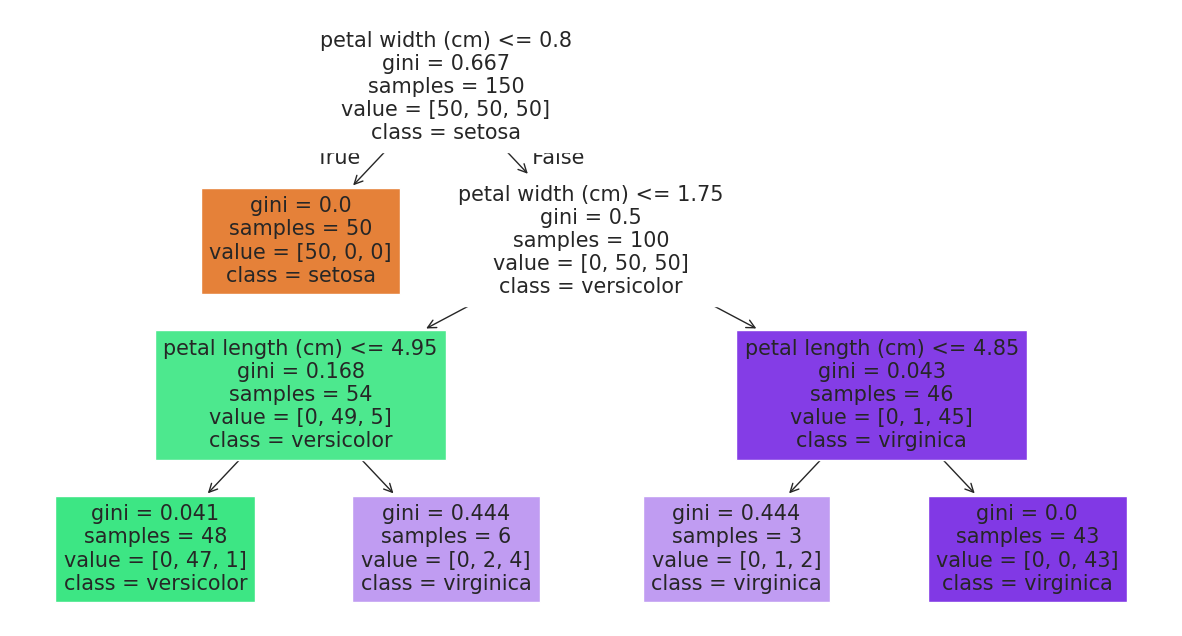

In [33]:
# plotting tree with max_depth=3
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
import pandas as pd

# Load data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train the classifier with max_depth=3
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

# Visualizing the tree with max_depth=3
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=data.target_names, filled=True, max_depth=3)
plt.show()


# Check the evaluation metrics of our default model on validation #setConfusion Matrix, Accuracy, Precision, Recall, F1 

In [32]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

In [28]:
# Printing confusion matrix and accuracy

In [35]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Predictions on the validation set
y_pred = clf.predict(X_val)

# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))  # For multiclass
print("Recall:", recall_score(y_val, y_pred, average='weighted'))        # For multiclass
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))          # For multiclass

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [36]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

# Load data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_val)

# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



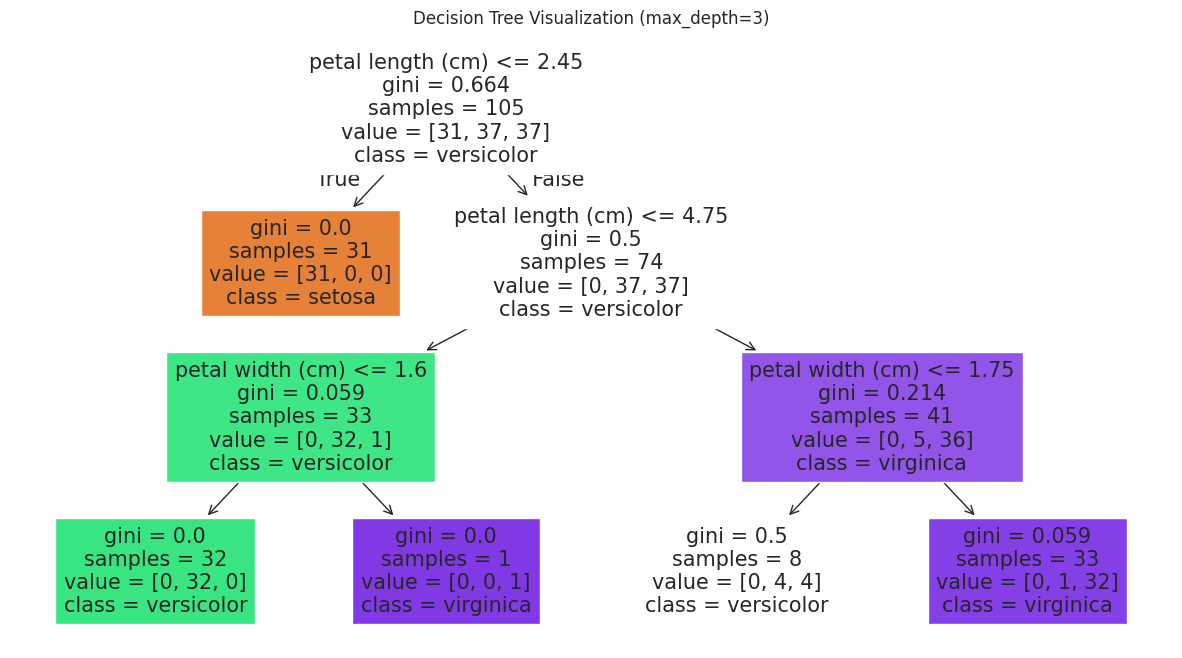

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Prediction Probabilities:
 [[0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.03030303 0.96969697]
 [0.         1.         0.        ]
 [0.         0.5        0.5       ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.03030303 0.96969697]
 [0.         1.         0.        ]
 [0.         1.         0

In [37]:
# Making predictions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier with max_depth=3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Visualizing the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=data.target_names, filled=True, max_depth=3)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()

# Predictions
y_pred = clf.predict(X_val)
y_prob = clf.predict_proba(X_val)  # For prediction probabilities

# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Display Predictions
print("\nPredictions:", y_pred)
print("Prediction Probabilities:\n", y_prob)


In [39]:
# Printing classification report
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_val)

# Printing Classification Report
print("Classification Report:\n")
print(classification_report(y_val, y_pred, target_names=data.target_names))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



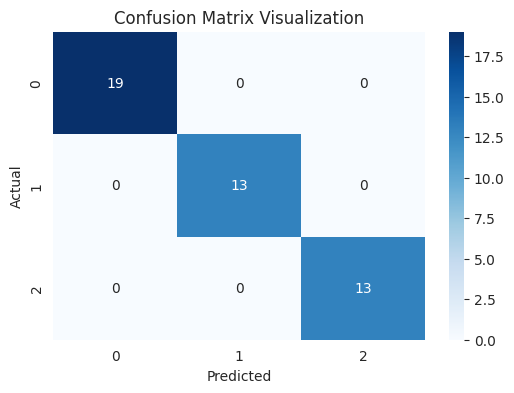

In [40]:
# Printing confusion matrix and accuracy
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')
plt.show()
